In [111]:
#the next two lines will expand the printed tables
# pd.options.display.max_rows= 40000
# pd.options.display.max_columns= 40000

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import trompy as tp

In [126]:
DATA_FOLDER = "..\\data"
df = pd.read_csv(os.path.join(DATA_FOLDER, "FED004_100322_00_MERGED.CSV"))

def tweak_fed(df):
    
    return (df
             .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
             .assign(t=lambda df_: pd.to_datetime(df_.t))
             .set_index("t")
             .query("Event == 'Pellet'")
             .loc[:,"ipi"] # could use .loc[:,["ipi", "col2", "col5" etc]] to get mutliple columns, e.g. animal name etc
           )
tweak_fed(df) # could add animal name from metafile and diet and phase so these are returned in dataframe

t
2022-10-03 09:15:03        NaN
2022-10-03 09:15:41       38.0
2022-10-03 11:23:35     7674.0
2022-10-03 11:24:31       56.0
2022-10-03 14:14:18    10187.0
                        ...   
2022-10-10 08:10:20     1994.0
2022-10-10 08:10:34       14.0
2022-10-10 08:10:46       12.0
2022-10-10 08:11:01       15.0
2022-10-10 08:12:09       68.0
Name: ipi, Length: 1390, dtype: float64

In [152]:
# read in metafile and put pellets dataframe in keys of a dict
METAFILE = "..\\METAFILE FEDXC DATA SHEETS.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

ff_dict = {}
for row in rows:
    file, mouse, diet, mode, sex,order,epoch = row
    if (mode == "FF") and (diet in ["NR", "PR"]):
        key = "_".join([mouse, epoch])
        ff_dict[key] = {}
        ff_dict[key]["mouse"] = mouse
        ff_dict[key]["diet"] = diet
        ff_dict[key]["sex"] = sex
        ff_dict[key]["epoch"] = epoch
        ff_dict[key]["order"] = int(order)
        ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, file)))
    


File is excel file. Making csv metafile first


In [115]:
ff_dict["FEDXC01_E4"]["pellets"].head() , ff_dict["FEDXC02_E4"]["pellets"].head(20)

(t
 2022-10-03 09:18:28      NaN
 2022-10-03 09:18:59     31.0
 2022-10-03 09:19:16     17.0
 2022-10-03 09:21:02    106.0
 2022-10-03 09:21:44     42.0
 Name: ipi, dtype: float64,
 t
 2022-10-03 09:18:06       NaN
 2022-10-03 09:18:50      44.0
 2022-10-03 09:20:04      74.0
 2022-10-03 11:21:14    7270.0
 2022-10-03 11:21:28      14.0
 2022-10-03 11:21:41      13.0
 2022-10-03 12:33:13    4292.0
 2022-10-03 13:41:54    4121.0
 2022-10-03 13:42:12      18.0
 2022-10-03 13:42:26      14.0
 2022-10-03 14:47:15    3889.0
 2022-10-03 14:47:28      13.0
 2022-10-03 15:12:06    1478.0
 2022-10-03 16:47:38    5731.0
 2022-10-03 16:47:57      20.0
 2022-10-03 17:11:06    1389.0
 2022-10-03 17:11:18      12.0
 2022-10-03 17:11:30      12.0
 2022-10-03 17:11:43      13.0
 2022-10-03 18:29:32    4669.0
 Name: ipi, dtype: float64)

In [103]:
pd??

Type:        module
String form: <module 'pandas' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>
File:        c:\programdata\anaconda3\lib\site-packages\pandas\__init__.py
Source:     
# flake8: noqa

__docformat__ = "restructuredtext"

# Let users know if they're missing any of our hard dependencies
hard_dependencies = ("numpy", "pytz", "dateutil")
missing_dependencies = []

for dependency in hard_dependencies:
    try:
        __import__(dependency)
    except ImportError as e:
        missing_dependencies.append(f"{dependency}: {e}")

if missing_dependencies:
    raise ImportError(
        "Unable to import required dependencies:\n" + "\n".join(missing_dependencies)
    )
del hard_dependencies, dependency, missing_dependencies

# numpy compat
from pandas.compat import is_numpy_dev as _is_numpy_dev

try:
    from pandas._libs import hashtable as _hashtable, lib as _lib, tslib as _tslib
except ImportError as err:  # pragma: no cover
    module = err.name
 

In [122]:
(ff_dict["FEDXC03_E2"]["pellets"]
 .resample("d")
 .count()
)

t
2022-09-19     82
2022-09-20    166
2022-09-21    172
2022-09-22    179
2022-09-23    187
2022-09-24    174
2022-09-25    116
2022-09-26    156
Freq: D, Name: ipi, dtype: int64

In [127]:
mice=[]
for key in ff_dict.keys():
    
    mouse= key.split("_")[0]
    if mouse not in mice:
        mice.append(mouse)

In [153]:
ff_dict_all_epochs={}
for mouse in mice:
    ff_dict_all_epochs[mouse]={}
    temp=[]
    for key, val in ff_dict.items():
        if mouse in key:
            temp.append(val["pellets"])
            ff_dict_all_epochs [mouse]["order"]= val["order"]
            
    ff_dict_all_epochs[mouse]["pellets"]=pd.concat(temp)
    

    
            
            
        

In [154]:
ff_dict_all_epochs["FEDXC08"]["order"]

1

In [192]:
ff_dict_all_epochs["FEDXC01"]["pellets"]

def pellets_by_day(df):
    return (df
            .resample("d", offset = "10H")
            .count()
            .reset_index()
            
           )

pellets_by_day(ff_dict_all_epochs["FEDXC01"]["pellets"])

NR=[]
PR=[]
for key, val in ff_dict_all_epochs.items():
    if val["order"] == 1:
        NR.append(pellets_by_day(val["pellets"]))
    elif val["order"] == 2:
        PR.append(pellets_by_day(val["pellets"]))
    
    


NR= pd.concat(NR, axis=1)
PR= pd.concat(PR, axis=1)

TypeError: errorbar() missing 1 required positional argument: 'y'

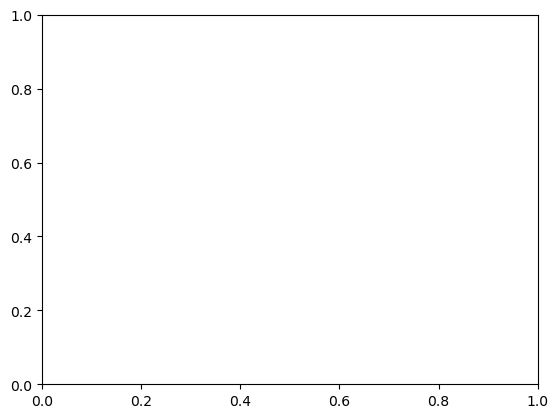

In [172]:
NR.mean(axis=1)
PR.mean(axis=1)

f, ax = plt.subplots()
ax.plot(NR.mean(axis=1), yerror= NR.sem(axis=1))
ax.plot(PR.mean(axis=1))

C:\Users\admin\AppData\Local\Temp\ipykernel_11612\4128679361.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  NR.mean(axis=1).plot(yerr= NR.sem(axis=1), ax=ax)
C:\Users\admin\AppData\Local\Temp\ipykernel_11612\4128679361.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NR.mean(axis=1).plot(yerr= NR.sem(axis=1), ax=ax)
C:\Users\admin\AppData\Local\Temp\ipykernel_11612\4128679361.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  PR.mean(axis=1).plot(yerr= PR.sem(axis=1), ax=ax)
C:\Users\admin\AppData\Local\Temp\ipykernel_11612\4128679361.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 

<AxesSubplot:>

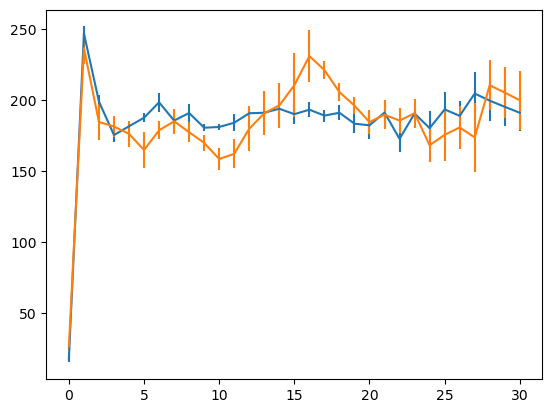

In [193]:
f, ax = plt.subplots()
NR.mean(axis=1).plot(yerr= NR.sem(axis=1), ax=ax)
PR.mean(axis=1).plot(yerr= PR.sem(axis=1), ax=ax)
#ax.set_xticks([0,1,2])

In [199]:
ff_dict_all_epochs["FEDXC01"]["pellets"]

# def calculate_meals(df):
#     return (df
            
        
def nmeals_by_day(df):
    return (df
            .resample("d", offset = "10H")
            .apply(lambda df_: sum(df_ > 60))
            .reset_index()
            
           )
nmeals_by_day (ff_dict_all_epochs["FEDXC01"]["pellets"])


def mealsize_by_day(df):
    return (df
            .resample("d", offset = "10H")
            .apply(lambda df_: df_.count()/sum(df_ > 60))
            .reset_index()
            
           )
mealsize_by_day (ff_dict_all_epochs["FEDXC01"]["pellets"])

,t,ipi
0,2022-09-09 10:00:00,2.636364
1,2022-09-10 10:00:00,2.048544
2,2022-09-11 10:00:00,2.528302
3,2022-09-12 10:00:00,2.393939
4,2022-09-13 10:00:00,2.644068
5,2022-09-14 10:00:00,2.413793
6,2022-09-15 10:00:00,3.387755
7,2022-09-16 10:00:00,3.434783
8,2022-09-17 10:00:00,3.340000
9,2022-09-18 10:00:00,3.074074


In [189]:
ff_dict_all_epochs["FEDXC01"]["pellets"]

def pellets_by_day(df):
    return (df
            .between_time()
            .resample("d", offset = "8H")
            .count()
            #.reset_index()
            
           )

pellets_by_day(ff_dict_all_epochs["FEDXC01"]["pellets"])

NR=[]
PR=[]
for key, val in ff_dict_all_epochs.items():
    if val["order"] == 1:
        NR.append(pellets_by_day(val["pellets"]))
    elif val["order"] == 2:
        PR.append(pellets_by_day(val["pellets"]))
    
    


NR= pd.concat(NR, axis=1)
PR= pd.concat(PR, axis=1)


f, ax = plt.subplots()
NR.mean(axis=1).plot(yerr= NR.sem(axis=1), ax=ax)
PR.mean(axis=1).plot(yerr= PR.sem(axis=1), ax=ax)
#ax.set_xticks([0,1,2])

TypeError: between_time() missing 2 required positional arguments: 'start_time' and 'end_time'

In [170]:
NR.sem(axis=1)

t
2022-09-10 08:00:00    42.961223
2022-09-11 08:00:00     9.001543
2022-09-12 08:00:00     5.602083
2022-09-13 08:00:00     2.375804
2022-09-14 08:00:00     2.800794
2022-09-15 08:00:00     3.800585
2022-09-16 08:00:00     6.696599
2022-09-17 08:00:00     6.637017
2022-09-18 08:00:00     3.239513
2022-09-19 08:00:00     1.666667
2022-09-20 08:00:00     5.585696
2022-09-21 08:00:00     6.140937
2022-09-22 08:00:00     4.222295
2022-09-23 08:00:00     6.721442
2022-09-24 08:00:00     7.512952
2022-09-25 08:00:00     4.896711
2022-09-26 08:00:00     3.956008
2022-09-27 08:00:00     4.638007
2022-09-28 08:00:00     7.766023
2022-09-29 08:00:00     7.391061
2022-09-30 08:00:00     8.667949
2022-10-01 08:00:00     7.129360
2022-10-02 08:00:00     6.804002
2022-10-03 08:00:00    10.683320
2022-10-04 08:00:00    13.568755
2022-10-05 08:00:00    12.183778
2022-10-06 08:00:00    14.423938
2022-10-07 08:00:00    15.186434
2022-10-08 08:00:00    12.666009
2022-10-09 08:00:00    10.474572
Freq: D,

In [86]:
def make_ff_df(df, mouse, diet):
    """
    Takes df of pellets - time and IPIs - and returns row for collated df
    """
    out = pd.DataFrame.from_dict({"mouse": [mouse],
                                  "diet": [diet],
                                  "n_pellets": [len(df)],
                                  "n_meals": (df > 60).sum(),
                                  "session_time": (df.index[-1] - df.index[0]).total_seconds() / 60,
                                  "short_ipis": (df < 5).sum()
                                  })

    return (out
           .assign(meal_freq=lambda df_: 1 / (df_.session_time / df_.n_meals) * 60 * 24,
                   meal_size=lambda df_: df_.n_pellets / df_.n_meals,
                   )
           .astype({"diet": "category",
                    "n_pellets": "uint16",
                    "n_meals": "uint16"}))

ff = pd.DataFrame()

for key, val in ff_dict.items():
    
    pellets = val["pellets"]
    mouse = val["mouse"]
    diet = val["diet"]
    ff = pd.concat([ff, make_ff_df(pellets, mouse, diet)])
    
ff.reset_index(drop=True, inplace=True);


In [89]:
ff.head(50)

,mouse,diet,n_pellets,n_meals,session_time,short_ipis,meal_freq,meal_size
0,FEDXC01,NR,1479,545,12947.350000,0,60.614720,2.713761
1,FEDXC01,PR,1083,469,10074.316667,0,67.037797,2.309168
2,FEDXC01,NR,1279,364,10076.800000,0,52.016513,3.513736
3,FEDXC01,PR,1051,472,10004.750000,0,67.935731,2.226695
4,FEDXC02,NR,1799,824,12927.316667,0,91.787030,2.183252
5,FEDXC02,PR,1227,659,10066.550000,0,94.268642,1.861912
6,FEDXC02,NR,1333,556,10075.400000,0,79.464835,2.397482
7,FEDXC02,PR,1261,689,10013.383333,0,99.083393,1.830189
8,FEDXC03,NR,1566,833,12935.433333,0,92.731335,1.879952
9,FEDXC03,PR,1233,626,10042.650000,0,89.761169,1.969649


In [82]:
# get all IPIs for distribution histogram

# all_ipis = []
# for key, data in ff_dict.items():
# #     print(key, len(data["pellets"]))
#     all_ipis.append(data["pellets"].dropna().clip(1))
    
# all_ipis = pd.concat(all_ipis)


# # get all IPIs for distribution histogram

# all_ipis = []
NR_IPIS = []
PR_IPIS = []
for key, data in ff_dict.items():
        if data ["diet"] == "NR":
            NR_IPIS.append(data["pellets"].dropna().clip(1))
        elif  data ["diet"] == "PR":
            PR_IPIS.append(data["pellets"].dropna().clip(1))
    
NR_IPISs = pd.concat(NR_IPIS)
PR_IPISs = pd.concat(PR_IPIS)

In [83]:
PR_IPISs 

t
2022-09-19 08:52:29     28.0
2022-09-19 08:55:35    185.0
2022-09-19 08:57:16    102.0
2022-09-19 09:01:28    252.0
2022-09-19 09:08:18    410.0
                       ...  
2022-10-10 08:00:50    400.0
2022-10-10 08:15:17    868.0
2022-10-10 08:15:36     19.0
2022-10-10 08:18:01    145.0
2022-10-10 08:18:14     13.0
Name: ipi, Length: 15670, dtype: float64

In [84]:
trans_ipis = [ipi for ipi in np.log10(all_ipis/60) if np.isfinite(ipi)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


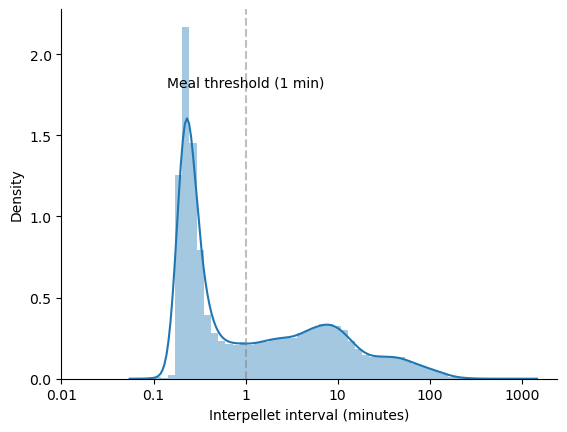

In [85]:
f, ax = plt.subplots()
data = sns.distplot(trans_ipis)
ax.set_xlabel("Interpellet interval (minutes)")
ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])

ax.axvline(0, linestyle="--", color="grey", alpha=0.5)
ax.text(0,1.8, "Meal threshold (1 min)", ha="center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#f.savefig("..\\results\\ipi_ff.png")

